# SICR (Carrier State)
This is the Python version of program 2.7 from page 44 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Parameters (rates here are specified in terms of days)
beta=0.2 #transmission rate from infected individuals
epsilon=0.1 #adjustment for transmission from carrier individuals
gamma=0.01 #recovery rate of infectious individuals
Gamma=0.001 #recovery rate of carrier individuals
mu=1/(50*365.0) #rate of births and natural deaths
q=0.4 #fraction of recoveries that become carriers


ND=20*365 #number of days
TS=1.0 #time step (1 day)

#initial conditions
S0=0.9
I0=1e-4
C0=1e-3
INPUT = (S0, I0, C0)

In [15]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * (V[1] + epsilon * V[2]) - mu * V[0]
	Y[1] = beta * V[0] * (V[1] + epsilon * V[2]) - gamma * V[1] - mu * V[1]
	Y[2] = q * gamma * V[1] - Gamma * V[2] - mu * V[2]
	return Y   # For odeint


In [16]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

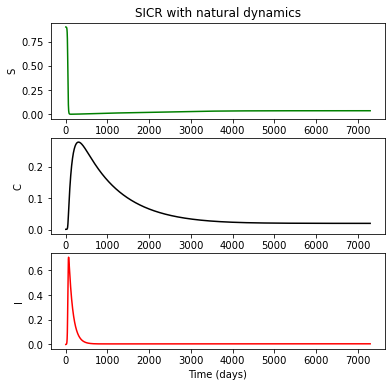

In [18]:
#Ploting
fig = plt.figure(figsize=(6,6))
plt.title('SICR with natural dynamics')
plt.axis('off')
fig.add_subplot(311)
plt.plot(RES[:,0], '-g')
plt.ylabel('S')
fig.add_subplot(312)
plt.plot(RES[:,2], '-k')
plt.ylabel('C')
fig.add_subplot(313)
plt.plot(RES[:,1], '-r')
#plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.ylabel('I')
plt.show()
fig.savefig('SICR.pdf')